### Description: This is a sentiment analysis that parses the tweets fetched from Tweeter using Python

In [2]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving api.csv to api.csv


In [169]:
log = pd.read_csv('api.csv')

In [170]:
# Twitter API Credentials
api_key = log['key'][0]
api_key_secret = log['key'][1]
access_token = log['key'][2]
access_token_secret = log['key'][3]

In [171]:
#authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

#user tweets

user = '@_UcheJN'

limit = 20000
tweets = tweepy.Cursor(api.user_timeline, screen_name=user, count= 200, tweet_mode = 'extended').items(limit)
#tweets = api.user_timeline(screen_name=user, count= limit, tweet_mode = 'extended')

#create dataframe
columns = ['Time', 'Tweets']
data=[]

for tweet in tweets:
    data.append([tweet.created_at, tweet.full_text])
df= pd.DataFrame(data,columns=columns)

# Pidgin Speakers on Twitter; @Nnestainless, @Ashleyonyx

# Clean the dataframe using re and .apply functions
def cleanTxt(text):
  text = re.sub(r'@[_A-Za-z0-9]+','',text) #Removes @ mentions
  text = re.sub(r'#','',text) # Removes Hastags 
  text = re.sub(r'\n','',text) # Removes new line characters
  text = re.sub(r'__','',text) #Removes underscore characters
  text = re.sub(r'RT[\s]+','',text) #Removes RT
  text = re.sub(r'https?:\/\/\S+','',text) #Removes hyperlink
  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Obtain Subjectivity and Polarity by creating functions
def Subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def Polarity(text):
  return TextBlob(text).sentiment.polarity

df['subjectivity'] = df['Tweets'].apply(Subjectivity)
df['polarity'] = df['Tweets'].apply(Polarity)

# Create a Function to compute sentiment
def Sentiment(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

df['sentiment'] = df['polarity'].apply(Sentiment)

In [172]:
df.head()

,Time,Tweets,subjectivity,polarity,sentiment
0,2022-06-29 15:30:20,,0.000000,0.00,Neutral
1,2022-06-29 15:26:42,Did take the structure from Muazu Babangida &...,0.000000,0.00,Neutral
2,2022-06-29 15:23:06,PDP are fighting amongst each other......🤣🤣🤣🤣🤣...,0.000000,0.00,Neutral
3,2022-06-29 15:16:48,: I thank Nigerians for showing love and suppo...,0.350000,0.35,Positive
4,2022-06-29 15:01:39,Do they have sense?......🤣🤣🤣🤣🤣Bunch of misinf...,0.416667,0.25,Positive


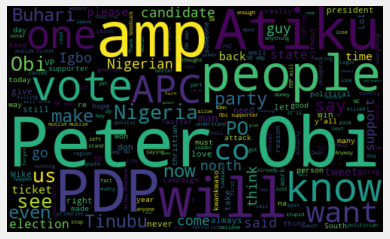

In [173]:
# Visual Word Cloud
allwords = ' '.join([tweet for tweet in df['Tweets']])
wordcloud = WordCloud(width=500,height=300,random_state=21, max_font_size=110).generate(allwords)

plt.imshow(wordcloud,interpolation='bilinear')

plt.axis('off')
plt.show()

Text(0, 0.5, 'Subjectivity')

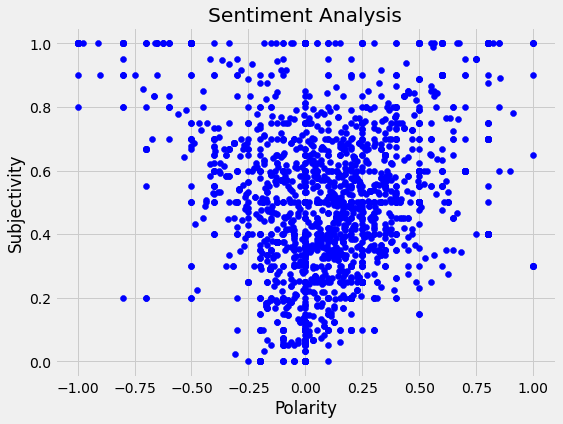

In [174]:
# Plot of Subjectivity against Polarity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df.polarity[i],df.subjectivity[i],color="Blue")

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [168]:
df.shape

(2968, 5)

In [175]:
df[df['sentiment'] == 'Negative'].count()

Time            682
Tweets          682
subjectivity    682
polarity        682
sentiment       682
dtype: int64

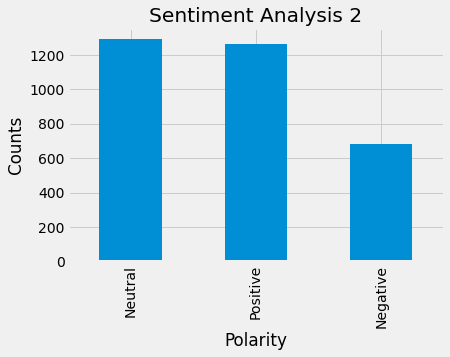

In [176]:
plt.title("Sentiment Analysis 2")
plt.xlabel('Polarity')
plt.ylabel('Counts')
df["sentiment"].value_counts().plot(kind='bar')
plt.show()